# Employee Attrition Analysis and Prediction  

## Project Overview  
This project aims to analyze employee attrition data and build machine learning models to predict employee turnover.  
We will explore the dataset, perform data preprocessing, build and optimize multiple ML models, and select the best-performing model.  

## Steps Overview  
1. **Data Exploration** – Understanding the dataset, visualizing key patterns.  
2. **Data Preprocessing** – Handling missing values, encoding categorical variables, feature selection.  
3. **Model Building** – Training different ML models for attrition prediction.  
4. **Model Optimization** – Hyperparameter tuning to improve model accuracy.  
5. **Model Evaluation** – Comparing models and selecting the best one.  
6. **Deployment Preparation** – Structuring the project for GitHub and future deployment.  

## Expected Outcome  
A well-documented machine learning pipeline that accurately predicts employee attrition and serves as a professional portfolio project.  

---


In [6]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# Load the dataset
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Display the first five rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Understanding & Initial Statistics  

## Objective  
Before building our machine learning model, we need to explore the dataset to understand its structure, key features, and potential data issues.  

## Key Steps  
1. **Dataset Overview** – Check the number of rows, columns, and data types.  
2. **Missing Values Analysis** – Identify any missing or inconsistent data.  
3. **Statistical Summary** – Get basic statistics of numerical and categorical features.  
4. **Target Variable Distribution** – Analyze the distribution of the "Attrition" column to check for class imbalance.  

Understanding the dataset is crucial for making informed preprocessing and modeling decisions. Let's begin!  


In [7]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# Check for missing values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
# Show basic statistics for numerical features
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
# Show basic statistics for categorical features
df.describe(include="object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [11]:
# Check the distribution of the target variable (Attrition)
print(df["Attrition"].value_counts(normalize=True) * 100)  # Percentage format

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


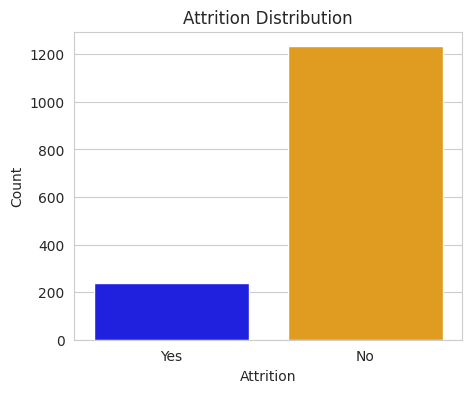

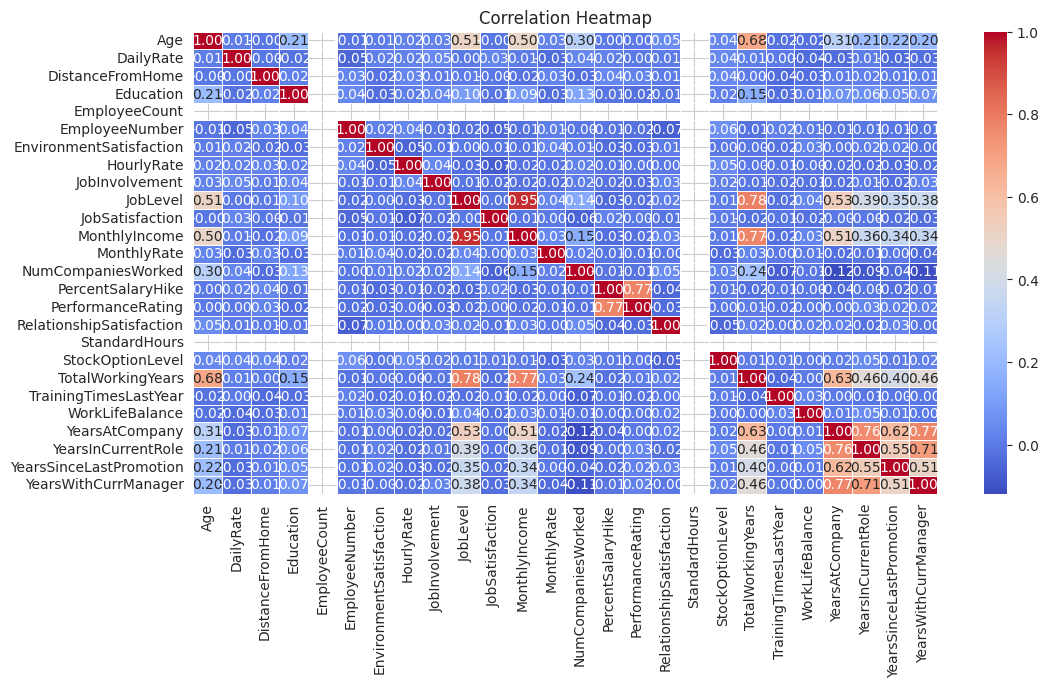

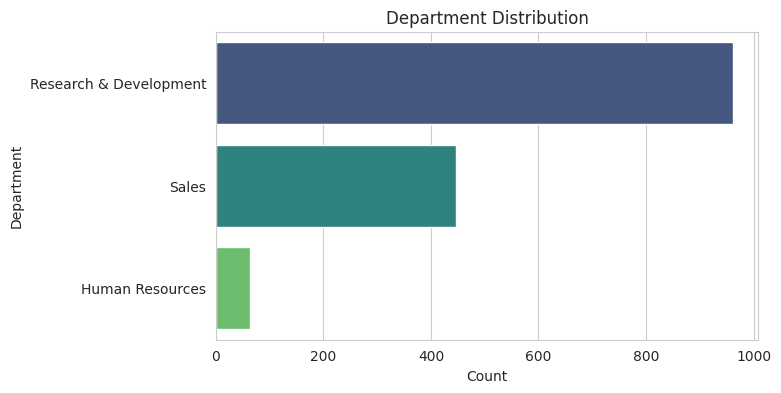

In [12]:
# lets do some visualizations to make it clear
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

#  Attrition Distribution
plt.figure(figsize=(5, 4))
sns.countplot(x="Attrition", data=df, palette=["blue", "orange"])
plt.title("Attrition Distribution")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

#  Correlation Heatmap (for numerical features)
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#  Categorical Feature Distribution (Example: Department)
plt.figure(figsize=(7, 4))
sns.countplot(y="Department", data=df, palette="viridis", order=df["Department"].value_counts().index)
plt.title("Department Distribution")
plt.xlabel("Count")
plt.ylabel("Department")
plt.show()


In [13]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f" Number of duplicate rows: {duplicates}")

# Check feature correlations again (if needed)
correlation_threshold = 0.8  # Define a high correlation threshold
corr_matrix = df.select_dtypes(include=["number"]).corr().abs()
high_corr_features = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns 
                      if i != j and corr_matrix.loc[i, j] > correlation_threshold]
print(" Highly correlated features:", high_corr_features)


 Number of duplicate rows: 0
 Highly correlated features: [('JobLevel', 'MonthlyIncome'), ('MonthlyIncome', 'JobLevel')]


#  Data Preprocessing  

## Objective  
Before training our machine learning models, we need to prepare the dataset by transforming raw data into a structured format suitable for modeling.  

## Key Steps  
1. **Handling Categorical Features** – Convert categorical variables into numerical values using encoding techniques.  
2. **Dropping Unnecessary Features** – Remove redundant or highly correlated features to avoid multicollinearity.  
3. **Scaling Numerical Features** – Normalize or standardize numerical columns for models that require it.  
4. **Handling Class Imbalance** – If necessary, apply techniques like oversampling or undersampling.  

Preprocessing ensures that our models learn effectively from the data, leading to better performance. Let's begin!  


In [14]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print(" Categorical Columns:", list(categorical_cols))

 Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [15]:
from sklearn.preprocessing import LabelEncoder

#  Label Encoding for Binary Features
binary_cols = ["Attrition", "Gender", "OverTime"]
le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])  # Convert Yes/No → 1/0

#  Drop "Over18" because it has no variance
df.drop(columns=["Over18"], inplace=True)

#  One-Hot Encoding for Multi-Class Categorical Features
df = pd.get_dummies(df, columns=["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus"], drop_first=True)

print(" Encoding Completed! Dataset is now ready for further preprocessing.")


 Encoding Completed! Dataset is now ready for further preprocessing.


In [16]:
# Drop Unnecessary or Highly Correlated Features
#From the previous analysis, we found that JobLevel and MonthlyIncome are highly correlated (> 0.8).
#Keeping both might introduce multicollinearity, which can negatively impact model performance.
# Drop JobLevel due to high correlation with MonthlyIncome
df.drop(columns=["JobLevel"], inplace=True)

print(" Dropped 'JobLevel' to avoid multicollinearity.")


 Dropped 'JobLevel' to avoid multicollinearity.


In [17]:
#Scale Numerical Features
#Some machine learning models (like Logistic Regression, SVM, and KNN)
#perform better when numerical features are scaled sence we are gonna use LR so it is useful
from sklearn.preprocessing import StandardScaler

#  Identify numerical columns
numerical_cols = df.select_dtypes(include=["number"]).columns.tolist()
numerical_cols.remove("Attrition")  # Exclude target variable

#  Apply Standard Scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(" Numerical features scaled successfully!")


 Numerical features scaled successfully!


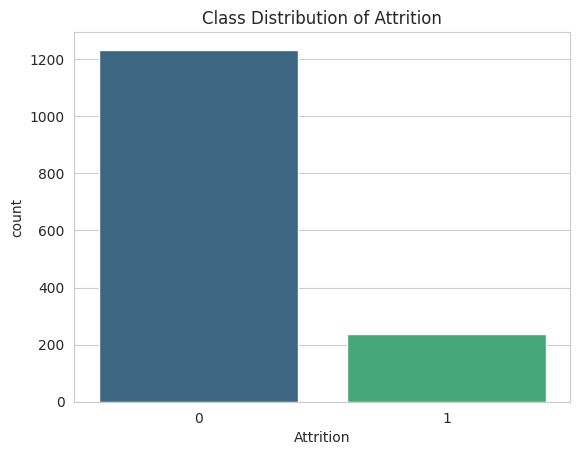

Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


In [18]:
#now the last step Handle Class Imbalance
#Since Attrition is our target variable (0 = No, 1 = Yes), we need to check if the dataset is imbalanced.
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each class
sns.countplot(x=df["Attrition"], palette="viridis")
plt.title("Class Distribution of Attrition")
plt.show()

# Print the percentage of each class
class_counts = df["Attrition"].value_counts(normalize=True) * 100
print(class_counts)


In [19]:
# sence the percentage is less then 20% the data ste is impalanced so we need to Handle Class Imbalance
from imblearn.over_sampling import SMOTE

# Define X (features) and y (target)
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Attrition"] = y_resampled  # Add target column back

# Check new class distribution
print(df_resampled["Attrition"].value_counts(normalize=True) * 100)
print(" Class imbalance fixed using SMOTE!")


Attrition
1    50.0
0    50.0
Name: proportion, dtype: float64
 Class imbalance fixed using SMOTE!


# Model Building

## Objective  
Now that our data is preprocessed and balanced, we will train multiple machine learning models to predict employee attrition.  

## Steps:  
1. **Split Data** – Divide the dataset into training and testing sets.  
2. **Train Multiple Models** – Compare different machine learning algorithms.  
3. **Evaluate Performance** – Use metrics like accuracy, precision, recall, and F1-score.  
4. **Optimize Hyperparameters** – Improve model performance using tuning techniques.  
5. **Select the Best Model** – Choose the model with the highest predictive power for deployment.  

Let's start with splitting the data!   


In [20]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_resampled.drop(columns=["Attrition"])
y = df_resampled["Attrition"]

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f" Data split completed! Training set: {X_train.shape}, Testing set: {X_test.shape}")


 Data split completed! Training set: (1972, 46), Testing set: (494, 46)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# Dictionary to store model results
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="F1-score", ascending=False))


                     Accuracy  Precision    Recall  F1-score
Random Forest        0.929150   0.952991  0.902834  0.927235
XGBoost              0.927126   0.956710  0.894737  0.924686
Logistic Regression  0.880567   0.901709  0.854251  0.877339


<Figure size 1000x600 with 0 Axes>

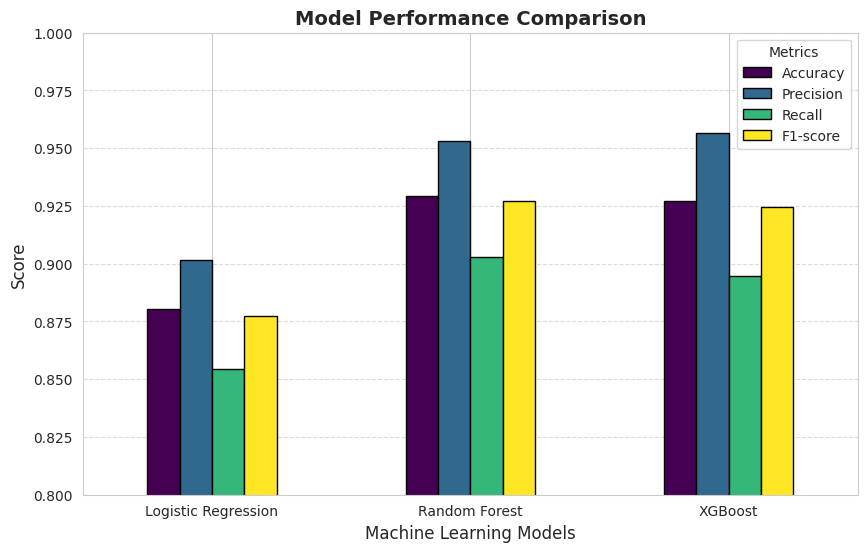

In [22]:
#Visualization of Model Performance before taking the best model and optimize it

# Set figure size
plt.figure(figsize=(10, 6))

# Convert results dictionary to DataFrame
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
results_df = results_df[metrics]

# Plot the performance of each model
results_df.plot(kind="bar", figsize=(10, 6), colormap="viridis", edgecolor="black")

# Customize the plot
plt.title("Model Performance Comparison", fontsize=14, fontweight="bold")
plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0.8, 1.0)
plt.legend(title="Metrics", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [28]:
# now sence the RF model has the best score we are going to perform Hyperparameter Tuning  to it
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],  
    "max_depth": [10, 20, None],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4]  
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="f1", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f" Best Parameters: {grid_search.best_params_}")
print(f" Best F1-score: {grid_search.best_score_:.4f}")

# Train the best model on the full training set
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluate on the test set
y_pred_best = best_rf.predict(X_test)
best_f1 = f1_score(y_test, y_pred_best)

print(f" Final F1-score on Test Set: {best_f1:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
 Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
 Best F1-score: 0.9404
 Final F1-score on Test Set: 0.9272


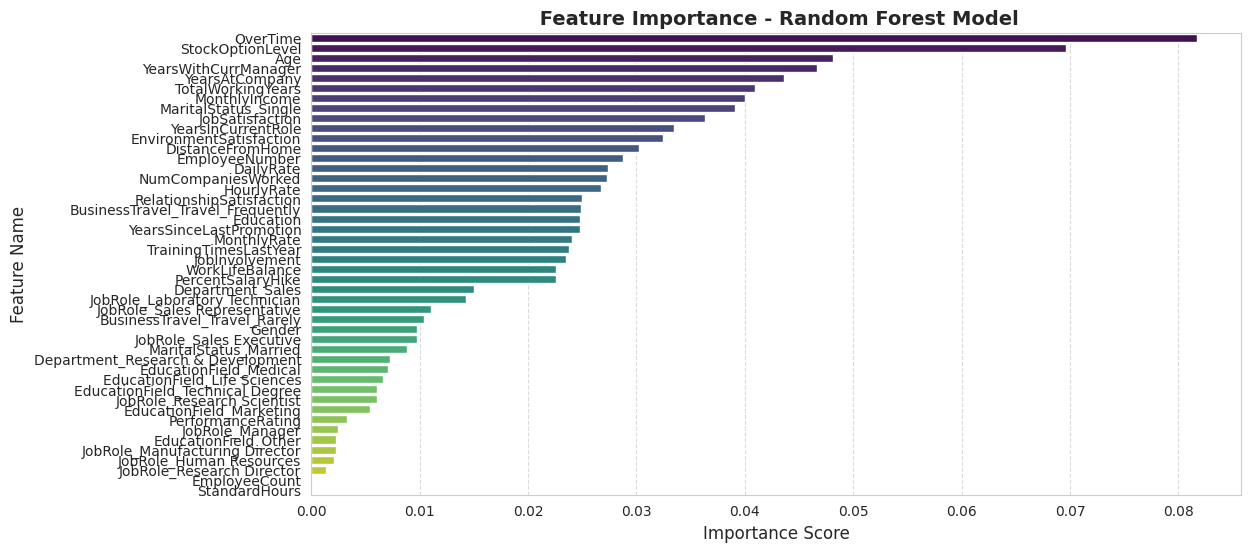

In [32]:
#visualizing the final results

# Get feature importances from the best Random Forest model
feature_importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame and sort features by importance
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")

# Customize the plot
plt.title(" Feature Importance - Random Forest Model", fontsize=14, fontweight="bold")
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [33]:
import joblib

# Print the features in X before saving
print(f" Number of features in X: {X.shape[1]}")
print(f" Feature names in X: {list(X.columns)}")

# Check if there were any issues with one-hot encoding
print(f" Unique values in y: {y.unique()}")


 Number of features in X: 46
 Feature names in X: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'J

In [34]:
import joblib

# Save the correct feature names
columns_used = X.columns
joblib.dump(columns_used, "columns_used.pkl")
print(" Correct feature names saved in 'columns_used.pkl'!")


 Correct feature names saved in 'columns_used.pkl'!


In [35]:
# Print the features in X before saving the scaler
print(f"Number of features in X (before saving scaler): {X.shape[1]}")
print(f"Feature names in X: {list(X.columns)}")


Number of features in X (before saving scaler): 46
Feature names in X: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Re

In [36]:
from sklearn.preprocessing import StandardScaler
import joblib

# Train a new StandardScaler with the correct features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Use the correct X

# Save the new scaler
joblib.dump(scaler, "scaler.pkl")
print(" Scaler has been correctly trained and saved as 'scaler.pkl'!")


 Scaler has been correctly trained and saved as 'scaler.pkl'!


In [37]:
# Save StandardScaler with the correct features
joblib.dump(scaler, "scaler.pkl")
print(" Scaler saved as 'scaler.pkl'!")


 Scaler saved as 'scaler.pkl'!


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Train a new model with the correct feature set
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Save the correctly trained model
joblib.dump(model, "random_forest_best_model.pkl")
print(" Model trained and saved as 'random_forest_best_model.pkl'!")


 Model trained and saved as 'random_forest_best_model.pkl'!
